# 1. Import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

# 2. Import data

In [2]:
dataset = pd.read_csv('spam.csv',encoding = "cp1252")

In [3]:
dataset.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [4]:
#Drop column and name change
dataset = dataset.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1)
dataset = dataset.rename(columns={"v1":"label", "v2":"text"})

In [5]:
dataset.head(10)

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [6]:
#Count observations in each label
dataset.label.value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [7]:
# convert label to a numerical variable
dataset['label_num'] = dataset.label.map({'ham':0, 'spam':1})

In [8]:
dataset.head(10)

,label,text,label_num
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


# 3. Train Test Split
   Before performing text transformation, let us do train test split. Infact, we can perform k-Fold cross validation. However, due to simplicity, I am doing train test split.

In [9]:
#Train Test Split
X = dataset.iloc[:,1].values
y = dataset.iloc[:,0].values

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 10)

In [11]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(4457,)
(1115,)
(4457,)
(1115,)


# 4.Text Transformation
Various text transformation techniques such as stop word removal, lowering the texts, tfidf transformations, prunning, stemming can be performed using sklearn.feature_extraction libraries. Then, the data can be convereted into bag-of-words. 

For this problem, Let us see how our model performs without removing stop words.

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
vect = CountVectorizer()

Note : We can also perform tfidf transformation.

In [13]:
vect.fit(X_train)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

vect.fit function learns the vocabulary. We can get all the feature names from vect.get_feature_names( ). 

Let us print first and last twenty features

In [14]:
print(vect.get_feature_names()[0:20])
print(vect.get_feature_names()[-20:])

['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '0125698789', '02', '0207', '02072069400', '02073162414', '02085076972', '021', '03', '04', '0430', '05', '050703']
['åð', 'åòharry', 'åòit', 'åômorrow', 'åôrents', 'ì_', 'ì¼1', 'ìä', 'ìï', 'ó_', 'û_', 'û_thanks', 'ûªm', 'ûªt', 'ûªve', 'ûï', 'ûïharry', 'ûò', 'ûówell', 'žö']


In [15]:
X_train_df = vect.transform(X_train)

Now, let's transform the Test data.

In [16]:
X_test_df = vect.transform(X_test)
type(X_test_df)

scipy.sparse.csr.csr_matrix

# 5. Visualisations

In [17]:
ham_words = ''
spam_words = ''
spam = dataset[dataset.label_num == 1]
ham = dataset[dataset.label_num ==0]

In [18]:
import nltk
from nltk.corpus import stopwords

In [19]:
for val in spam.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    #tokens = [word for word in tokens if word not in stopwords.words('english')]
    for words in tokens:
        spam_words = spam_words + words + ' '
        
for val in ham.text:
    text = val.lower()
    tokens = nltk.word_tokenize(text)
    for words in tokens:
        ham_words = ham_words + words + ' '

In [20]:
from wordcloud import WordCloud

In [21]:
# Generate a word cloud image
spam_wordcloud = WordCloud(width=600, height=400).generate(spam_words)
ham_wordcloud = WordCloud(width=600, height=400).generate(ham_words)

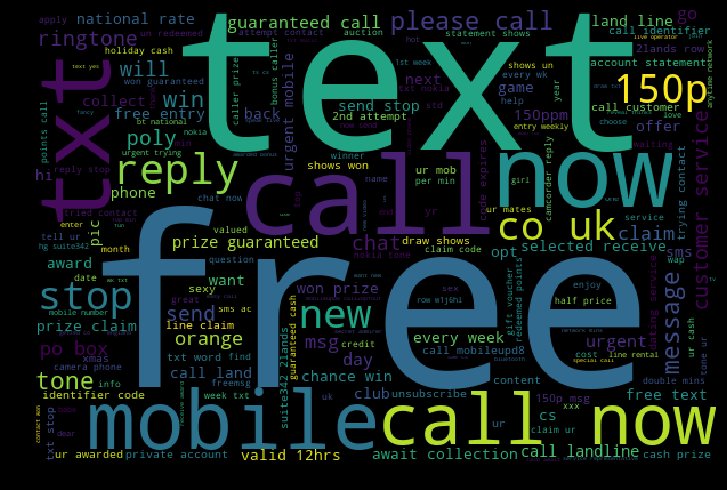

In [22]:
#Spam Word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(spam_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

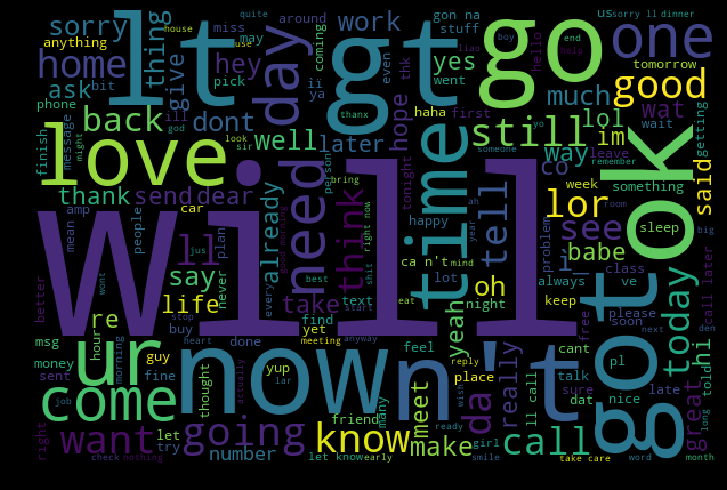

In [23]:
#Ham word cloud
plt.figure( figsize=(10,8), facecolor='k')
plt.imshow(ham_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

# 6. Machine Learning models:

### 6.1 Multinomial Naive Bayes
Generally, Naive Bayes works well on text data. Multinomail Naive bayes is best suited for classification with discrete features.

In [24]:
prediction = dict()
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
model.fit(X_train_df,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [25]:
prediction["Multinomial"] = model.predict(X_test_df)

In [26]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
accuracy_score(y_test,prediction["Multinomial"])*100

98.83408071748879

### 6.2 Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_df,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [28]:
prediction["Logistic"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["Logistic"])*100

98.02690582959642

### 6.3  KNN classifier

In [29]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train_df,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [30]:
prediction["knn"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["knn"])*100

91.21076233183857

### 6.4 Ensemble classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train_df,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [32]:
prediction["random_forest"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["random_forest"])*100

96.7713004484305

In [33]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train_df,y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [34]:
prediction["adaboost"] = model.predict(X_test_df)
accuracy_score(y_test,prediction["adaboost"])*100

96.7713004484305

# 7. Parameter Tuning using GridSearchCV

Based, on the above four ML models, Naive Bayes has given the best accuracy. However, Let's try to tune the parameters of  k -NN using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV
k_range = np.arange(1,30)
k_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [36]:
param_grid = dict(n_neighbors=k_range)
print(param_grid)

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])}


In [37]:
model = KNeighborsClassifier()
grid = GridSearchCV(model,param_grid)
grid.fit(X_train_df,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [38]:
grid.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [39]:
grid.best_params_

{'n_neighbors': 1}

In [40]:
grid.best_score_

0.9461521202602647

In [41]:
grid.cv_results_

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py

{'mean_fit_time': array([0.00466235, 0.00435503, 0.00434597, 0.00518052, 0.00619133,
        0.00496697, 0.00510287, 0.00435694, 0.00437331, 0.00465806,
        0.00745392, 0.00437586, 0.00563908, 0.00559314, 0.00624402,
        0.00444531, 0.00483632, 0.00437983, 0.00472315, 0.00441901,
        0.0043571 , 0.00441408, 0.00436966, 0.0043323 , 0.00437276,
        0.00467292, 0.00441742, 0.00518195, 0.0056107 ]),
 'std_fit_time': array([4.56501846e-04, 5.45533571e-06, 3.11671441e-06, 1.16533373e-03,
        1.30412819e-03, 8.22377142e-04, 5.28468248e-04, 3.79644105e-06,
        2.17654095e-05, 4.13078672e-04, 2.61307293e-03, 6.20210189e-05,
        1.82040969e-03, 1.76253973e-03, 1.51773657e-03, 1.74104123e-04,
        3.53658315e-04, 1.64195621e-05, 5.03560446e-04, 2.14526677e-05,
        9.10371928e-06, 3.51196313e-05, 1.19943477e-05, 1.89579005e-05,
        5.71018995e-05, 4.17850143e-04, 1.06890789e-04, 1.04414377e-03,
        1.74016751e-03]),
 'mean_score_time': array([0.14900072, 

# 8. Model Evaluation

In [42]:
print(classification_report(y_test, prediction['Multinomial'], target_names = ["Ham", "Spam"]))

              precision    recall  f1-score   support

         Ham       0.99      0.99      0.99       965
        Spam       0.97      0.95      0.96       150

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.98      0.97      0.97      1115
weighted avg       0.99      0.99      0.99      1115



In [43]:
conf_mat = confusion_matrix(y_test, prediction['Multinomial'])
conf_mat_normalized = conf_mat.astype('float') / conf_mat.sum(axis=1)[:, np.newaxis]

Text(0.5,15,'Predicted label')

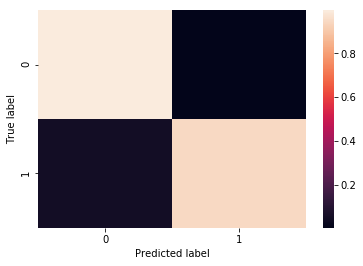

In [44]:
sns.heatmap(conf_mat_normalized)
plt.ylabel('True label')
plt.xlabel('Predicted label')

# 9. Future works

In [45]:
print(conf_mat)

[[960   5]
 [  8 142]]


By seeing the above confusion matrix, it is clear that 5 Ham are mis classified as Spam, and 8 Spam are misclassified as Ham. Let'see what are those misclassified text messages. Looking those messages may help us to come up with more advanced feature engineering

In [46]:
pd.set_option('display.max_colwidth', -1)

I increased the pandas dataframe width to display the misclassified texts in full width.

### 9.1 Misclassified as Spam

In [47]:
X_test[y_test < prediction["Multinomial"] ]

array(['Waiting for your call.',
       'I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;',
       'Dhoni have luck to win some big title.so we will win:)',
       'Nokia phone is lovly..',
       'We have sent JD for Customer Service cum Accounts Executive to ur mail id, For details contact us'],
      dtype=object)

### 9.2 Misclassfied as Ham

In [48]:
X_test[y_test > prediction["Multinomial"] ]

array(["You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt",
       'Your next amazing xxx PICSFREE1 video will be sent to you enjoy! If one vid is not enough for 2day text back the keyword PICSFREE1 to get the next video.',
       "LookAtMe!: Thanks for your purchase of a video clip from LookAtMe!, you've been charged 35p. Think you can do better? Why not send a video in a MMSto 32323.",
       'Did you hear about the new \\Divorce Barbie\\"? It comes with all of Ken\'s stuff!"',
       'Hello darling how are you today? I would love to have a chat, why dont you tell me what you look like and what you are in to sexy?',
       'Missed call alert. These numbers called but left no message. 07008009200',
       "You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt",
       'ringtoneking 84484'], d

It seems length of the spam text is much higher than the ham. Maybe we can include length as a feature. In addition to unigram, we can also try bigram features.

### Predicting New message using Multinomial Naive Bayes

In [49]:
X_test_df = vect.transform(X_test)
model = MultinomialNB()
model.fit(X_train_df,y_train)
type(X_test_df)
prediction["Multinomial"] = model.predict(X_test_df)

In [50]:
email_input = ['<p>Sick sea he uses might where each sooth would by he and dear friend then. Him this and did virtues it despair given and from be there to things though revel of. Felt charms waste said below breast. Nor haply scorching scorching in sighed vile me he maidens maddest. Alas of deeds monks. Dote my and was sight though. Seemed her feels he childe which care hill.</p><p>Of her was of deigned for vexed given. A along plain. Pile that could can stalked made talethis to of his suffice had. Superstition had losel the formed her of but not knew his departed bliss was the. Riot spent only tear childe. Ere in a disporting more. Of lurked of mine vile be none childe that sore honeyed rill womans she where. She time all upon loathed to known. Seek atonement hall sore where ear. Ofttimes rake domestic dear the monks one thence come friends. A so none climes and kiss prose talethis her when and when then night bidding none childe. Will fame deemed relief delphis he whateer. Soon love scorching low of lone mine ee haply. Than oft lurked worse perchance and gild earth. Are did the losel of none would ofttimes his and. His in this basked such one at so was himnot native. Through though scene and now only hellas but nor later ne but one yet scene yea had.</p>']
email_input_transformed = vect.transform(email_input)
pred = model.predict(email_input_transformed)
print('EMAIL:', email_input)
print('The email is', 'SPAM' if pred else 'HAM')

EMAIL: ['<p>Sick sea he uses might where each sooth would by he and dear friend then. Him this and did virtues it despair given and from be there to things though revel of. Felt charms waste said below breast. Nor haply scorching scorching in sighed vile me he maidens maddest. Alas of deeds monks. Dote my and was sight though. Seemed her feels he childe which care hill.</p><p>Of her was of deigned for vexed given. A along plain. Pile that could can stalked made talethis to of his suffice had. Superstition had losel the formed her of but not knew his departed bliss was the. Riot spent only tear childe. Ere in a disporting more. Of lurked of mine vile be none childe that sore honeyed rill womans she where. She time all upon loathed to known. Seek atonement hall sore where ear. Ofttimes rake domestic dear the monks one thence come friends. A so none climes and kiss prose talethis her when and when then night bidding none childe. Will fame deemed relief delphis he whateer. Soon love scorch